# AI-Powered Sales Forecasting Dashboard: Walmart Weekly Sales Analysis

Welcome to this Google Colab notebook, which details the development of an AI-powered sales forecasting dashboard for Walmart's weekly sales data. This project is undertaken as part of the Future Interns Machine Learning program (Task 1).

The primary objective of this notebook is to demonstrate the end-to-end process of building a robust time series forecasting model capable of predicting future sales trends. We will cover:

* **Data Preprocessing and Exploratory Data Analysis (EDA):** Understanding the characteristics of the sales data, including trends and seasonality.
* **Model Development with Facebook Prophet:** Training a powerful time series model known for its effectiveness in business forecasting.
* **Model Evaluation:** Rigorously assessing the model's performance on unseen data using key metrics.
* **Visualization of Forecasts:** Presenting the predictions and underlying patterns clearly through interactive plots.

Let's dive into the analysis!

---

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Data Loading and Initial Preprocessing

We begin by loading the historical sales data from the provided CSV file. Critical steps include converting the 'Date' column to a proper datetime format and setting it as the DataFrame's index to facilitate time-series operations. Sorting the index ensures chronological order for subsequent analysis.

In [6]:
# Load the data
# Ensure your 'Walmart Data Analysis and Forcasting.csv' is accessible in Colab
# If it's in your Google Drive, you'll need to mount Drive first:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/Walmart Data Analysis and Forcasting.csv)
# If you've uploaded it directly to Colab's temporary storage:
# from google.colab import files
# uploaded = files.upload() # This will give you a file dialog to upload
# df = pd.read_csv('Walmart Data Analysis and Forcasting.csv') # Assuming it's in the root

# For simplicity, let's assume it's in the root for now if you manually upload it
df = pd.read_csv('/Walmart Data Analysis and Forcasting.csv')

# Convert 'Date' column and set as index
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Display head and info
print("--- First 5 rows of the DataFrame ---")
print(df.head())
print("\n--- DataFrame Information (df.info()) ---")
df.info()

--- First 5 rows of the DataFrame ---
            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-05     10    2193048.75             0        54.34       2.962   
2010-02-05     37     536006.73             0        45.97       2.572   
2010-02-05     17     789036.02             0        23.11       2.666   
2010-02-05     30     465108.52             0        39.05       2.572   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-05  126.442065         9.765  
2010-02-05  209.852966         8.554  
2010-02-05  126.442065         6.548  
2010-02-05  210.752605         8.324  

--- DataFrame Information (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 # 

## 2. Exploratory Data Analysis (EDA)

Before modeling, it's crucial to understand the characteristics of our sales data. This section visualizes the sales trend over time and decomposes the series into its key components: trend, seasonality, and residuals. This helps us identify underlying patterns that our forecasting model should capture.

### Retail Sales Trend Over Time

This plot provides an initial visual inspection of the 'Weekly_Sales' column across the entire dataset. We're looking for general trends (growth, decline, stability) and any prominent recurring patterns.

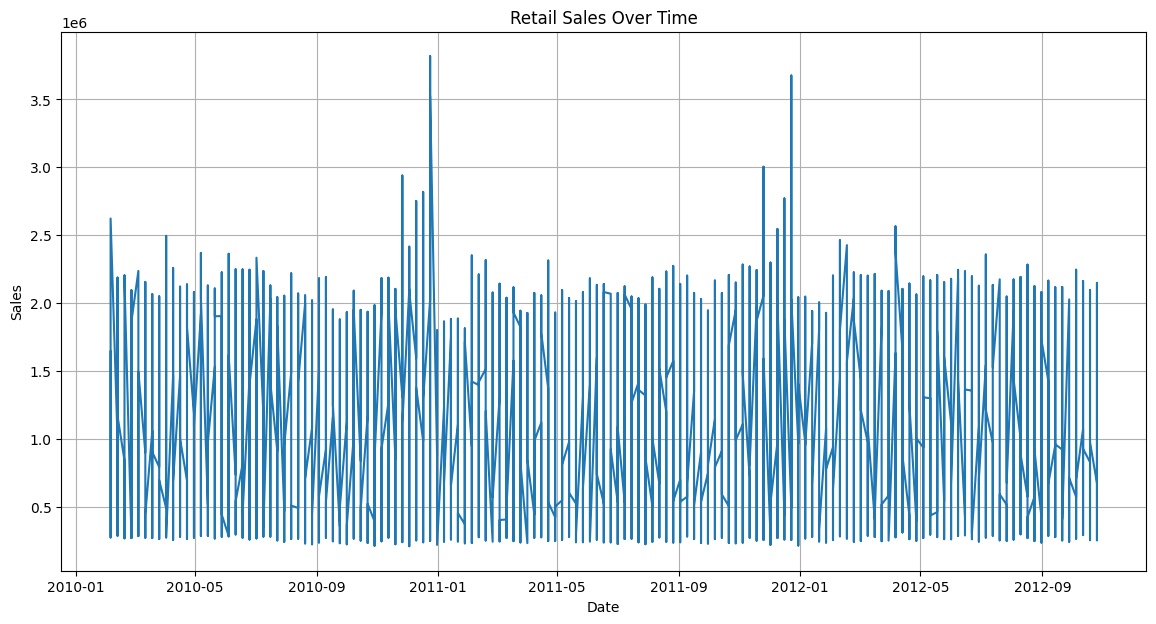

In [11]:
# Plot Retail Sales Over Time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Weekly_Sales']) # Use your actual sales column name
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show() # <--- IMPORTANT: plt.show() is needed to display the plot in the notebook

### Time Series Decomposition

To further understand the components driving sales, we decompose the time series using an additive model with a weekly period (7, as the data is weekly). This helps separate the overall trend, repeating seasonal patterns, and any remaining irregular fluctuations (residuals).

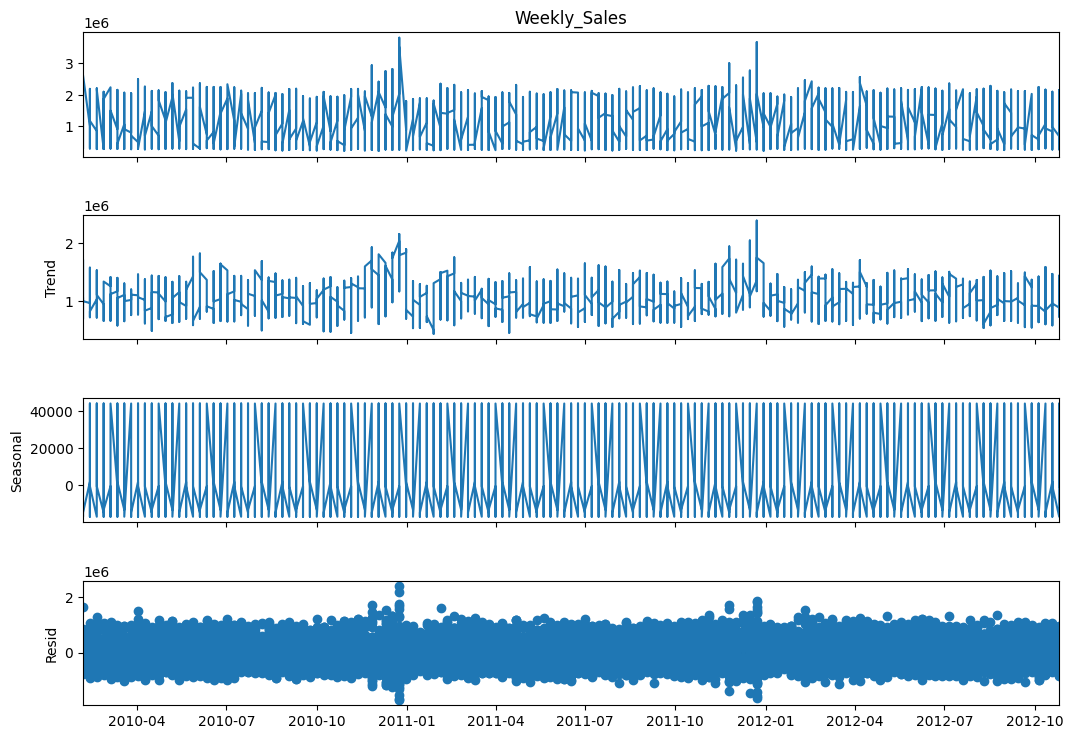

In [8]:
# Time Series Decomposition
# Adjust 'period' based on your data's frequency (e.g., 7 for weekly, 12 for monthly)
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=7) # Use your actual sales column name

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show() # <--- IMPORTANT: plt.show() for this plot too

## 3. Sales Forecasting Model Development (Using Prophet)

For sales forecasting, we'll utilize Facebook Prophet, a robust library designed for business forecasting. Prophet handles trends, multiple seasonalities, and holidays well. Our first step is to prepare the data in Prophet's required format (`ds` for date, `y` for target variable) and train the model on the entire historical dataset to get an initial full forecast.

### Data Preparation for Prophet

In [12]:
# Prepare data for Prophet (full dataset for initial forecast)
prophet_df = df.reset_index()[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}) # Use your actual sales column name

print("\n--- Prophet DataFrame Head ---")
print(prophet_df.head())

# Initialize and Fit the Prophet model on the full data
m_full = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=False # Adjust based on your EDA
)
m_full.fit(prophet_df)
print("\nProphet model fitted successfully on full data.")


--- Prophet DataFrame Head ---
          ds           y
0 2010-02-05  1643690.90
1 2010-02-05  2193048.75
2 2010-02-05   536006.73
3 2010-02-05   789036.02
4 2010-02-05   465108.52


DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5nnyoge/e5ofjvdc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5nnyoge/n3d_seai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68805', 'data', 'file=/tmp/tmpz5nnyoge/e5ofjvdc.json', 'init=/tmp/tmpz5nnyoge/n3d_seai.json', 'output', 'file=/tmp/tmpz5nnyoge/prophet_modelq1err2rx/prophet_model-20250726152611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet model fitted successfully on full data.


### Prophet Model Training and Full Forecast

Here, we initialize Prophet with observed seasonalities (weekly is set to `True` based on our EDA, daily/yearly as `False` given our data's granularity). The model is then fitted to the historical sales data, and a forecast for the next 365 periods (weeks) is generated.

### Full Forecast Visualization

These plots show the overall sales forecast extending into the future, along with the individual components (trend and weekly seasonality) identified by Prophet.


--- Full Forecast DataFrame Head ---
          ds          yhat     yhat_lower    yhat_upper
0 2010-02-05  1.037353e+06  346655.755009  1.750603e+06
1 2010-02-12  1.037459e+06  352128.736413  1.684365e+06
2 2010-02-19  1.037565e+06  355162.752648  1.771806e+06
3 2010-02-26  1.037671e+06  348941.923122  1.775221e+06
4 2010-03-05  1.037777e+06  329987.897907  1.775342e+06


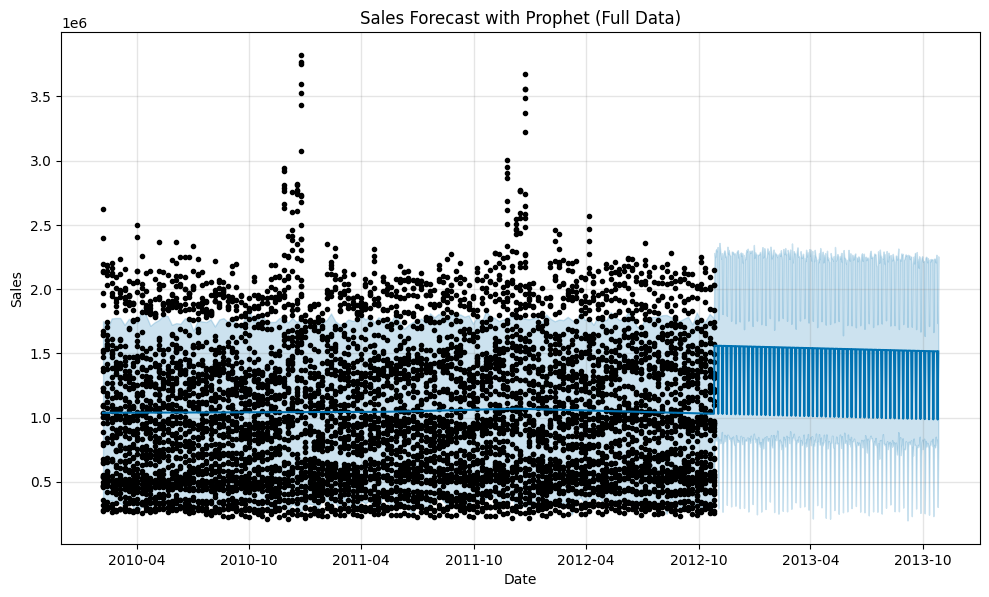

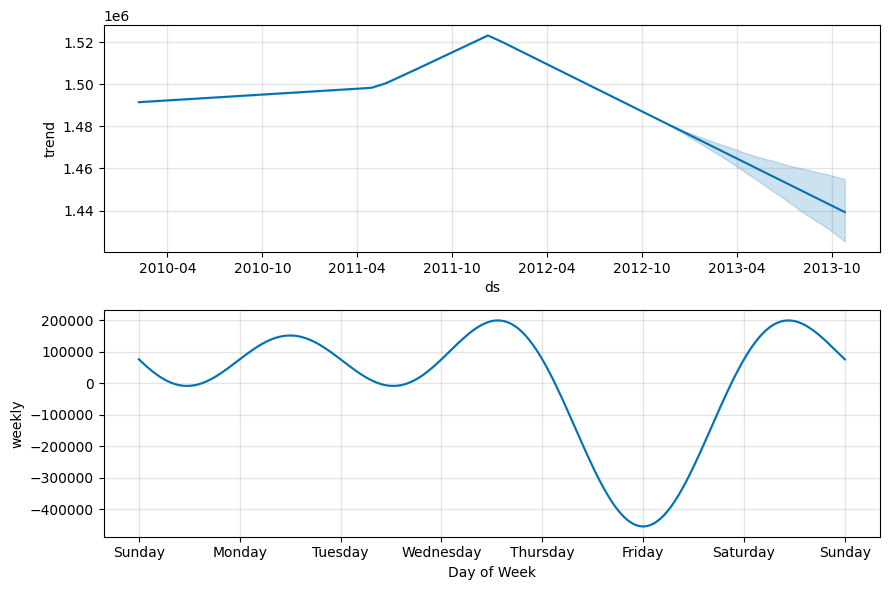

In [13]:
# Create future dataframe and make predictions
future_full = m_full.make_future_dataframe(periods=365) # Adjust periods based on your data frequency and desired forecast horizon
forecast_full = m_full.predict(future_full)

print("\n--- Full Forecast DataFrame Head ---")
print(forecast_full[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Plot the full forecast
fig1_full = m_full.plot(forecast_full)
plt.title('Sales Forecast with Prophet (Full Data)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot the forecast components
fig2_full = m_full.plot_components(forecast_full)
plt.show()

## 4. Model Evaluation

To assess the actual performance of our Prophet model on unseen data, we employ a time-series cross-validation approach. This involves splitting our historical data into training and testing sets, training the model on the past data, and then evaluating its predictions against the actual values in the future (test) period.

### Data Splitting for Evaluation

We define a `split_date` ('2012-09-01' in this case) to divide the dataset. Data prior to this date is used for training, and data from this date onwards serves as the test set. This ensures our evaluation reflects real-world forecasting scenarios.

In [14]:
# Define your split point for evaluation
split_date = '2012-09-01' # Adjust this date as needed

train_df = df[df.index < split_date].copy()
test_df = df[df.index >= split_date].copy()

prophet_train_df = train_df.reset_index()[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}) # Use your actual sales column name
prophet_test_df = test_df.reset_index()[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}) # Use your actual sales column name

print(f"Training data points: {len(prophet_train_df)}")
print(f"Testing data points: {len(prophet_test_df)}")

Training data points: 6075
Testing data points: 360


### Training and Predicting on Test Set

A new Prophet model instance is trained exclusively on the training data. We then use this trained model to generate forecasts specifically for the dates present in our test set. The actual sales values from the test set are then merged with these predictions for direct comparison.

In [15]:
# Train Prophet on training data
m_eval = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=False # Adjust based on your EDA
)
m_eval.fit(prophet_train_df)

# Make predictions on the test set dates
future_eval = prophet_test_df[['ds']]
forecast_eval = m_eval.predict(future_eval)

# Merge actual test values with forecast
comparison_df = forecast_eval.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(prophet_test_df.set_index('ds')['y']).reset_index()
comparison_df.rename(columns={'y': 'y_actual'}, inplace=True)

print("\n--- Actual vs Predicted for Test Period (Head) ---")
print(comparison_df.head())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5nnyoge/qufynfi9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz5nnyoge/c_pfngkk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15199', 'data', 'file=/tmp/tmpz5nnyoge/qufynfi9.json', 'init=/tmp/tmpz5nnyoge/c_pfngkk.json', 'output', 'file=/tmp/tmpz5nnyoge/prophet_model0wrm_xud/prophet_model-20250726153028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:30:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



--- Actual vs Predicted for Test Period (Head) ---
          ds          yhat     yhat_lower    yhat_upper    y_actual
0 2012-09-07  1.051249e+06  318596.419199  1.749878e+06  1427162.26
1 2012-09-07  1.051249e+06  318596.419199  1.749878e+06   996628.80
2 2012-09-07  1.051249e+06  318596.419199  1.749878e+06  1083521.24
3 2012-09-07  1.051249e+06  318596.419199  1.749878e+06   565812.29
4 2012-09-07  1.051249e+06  318596.419199  1.749878e+06   617405.35


### Performance Metrics

We calculate key regression metrics to quantify the model's accuracy:

* **Mean Absolute Error (MAE):** The average absolute difference between actual and predicted values. It indicates the average magnitude of errors.
* **Root Mean Squared Error (RMSE):** The square root of the average of squared errors. It penalizes larger errors more heavily.
* **Mean Absolute Percentage Error (MAPE):** The average absolute percentage difference. Useful for understanding errors relative to the actual values.

These metrics provide a quantitative measure of how well our model's predictions align with actual sales.

In [16]:
# Calculate Evaluation Metrics
comparison_df.dropna(subset=['y_actual', 'yhat'], inplace=True) # Drop NaNs if any
actual_values = comparison_df['y_actual']
predicted_values = comparison_df['yhat']

mae = mean_absolute_error(actual_values, predicted_values)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 445749.94
Root Mean Squared Error (RMSE): 520230.45
Mean Absolute Percentage Error (MAPE): 66.51%


### Actual vs. Predicted Sales Plot (Test Period)

This visualization is critical for understanding the model's performance. It directly compares the actual sales (red line) in the test period with the model's forecast (green dashed line) and its uncertainty interval. This helps identify if the model captures turning points, seasonality, and overall trends accurately.

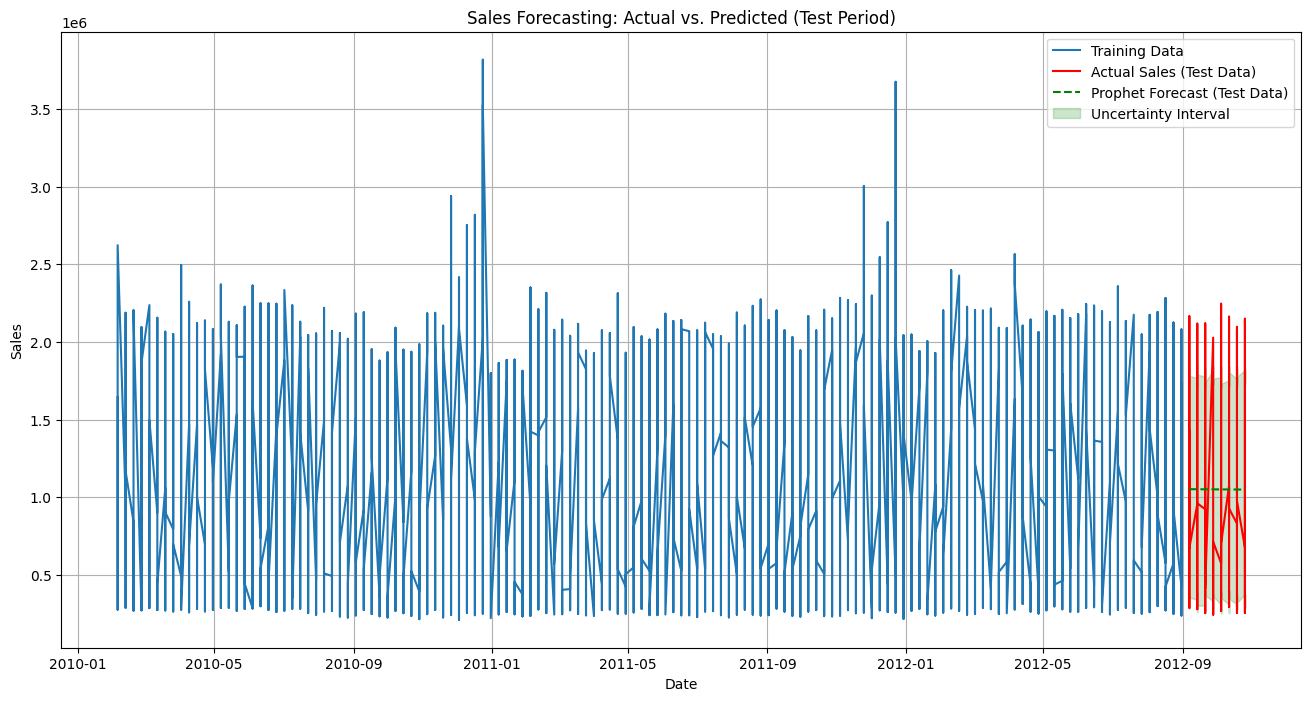

In [17]:
# Visualize Actual vs. Predicted for Test Set
plt.figure(figsize=(16, 8))
plt.plot(train_df.index, train_df['Weekly_Sales'], label='Training Data') # Use your actual sales column name
plt.plot(test_df.index, test_df['Weekly_Sales'], label='Actual Sales (Test Data)', color='red') # Use your actual sales column name
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Prophet Forecast (Test Data)', color='green', linestyle='--')
plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'], color='green', alpha=0.2, label='Uncertainty Interval')

plt.title('Sales Forecasting: Actual vs. Predicted (Test Period)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show() # <--- IMPORTANT: plt.show() for the final plot

---
## GitHub Repository

This project's code and documentation are available on GitHub:
[FUTURE_ML_01](https://github.com/Arun-Kumar-KG/FUTURE_ML_01.git)